In [24]:
# upload data
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [25]:
from keras import utils

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


# normalizing the data
X_train /= 255.0
X_test /= 255.0

In [26]:
# need this when fit because cause error in shape
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 29, 29, 250)         │          12,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 26, 26, 150)         │         600,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 24, 24, 40)          │          54,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 40)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2560)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 500)                 │       1,280,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 100)                 │          50,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,002,600 (7.64 MB)

 Trainable params: 2,002,600 (7.64 MB)

 Non-trainable params: 0 (0.00 B)

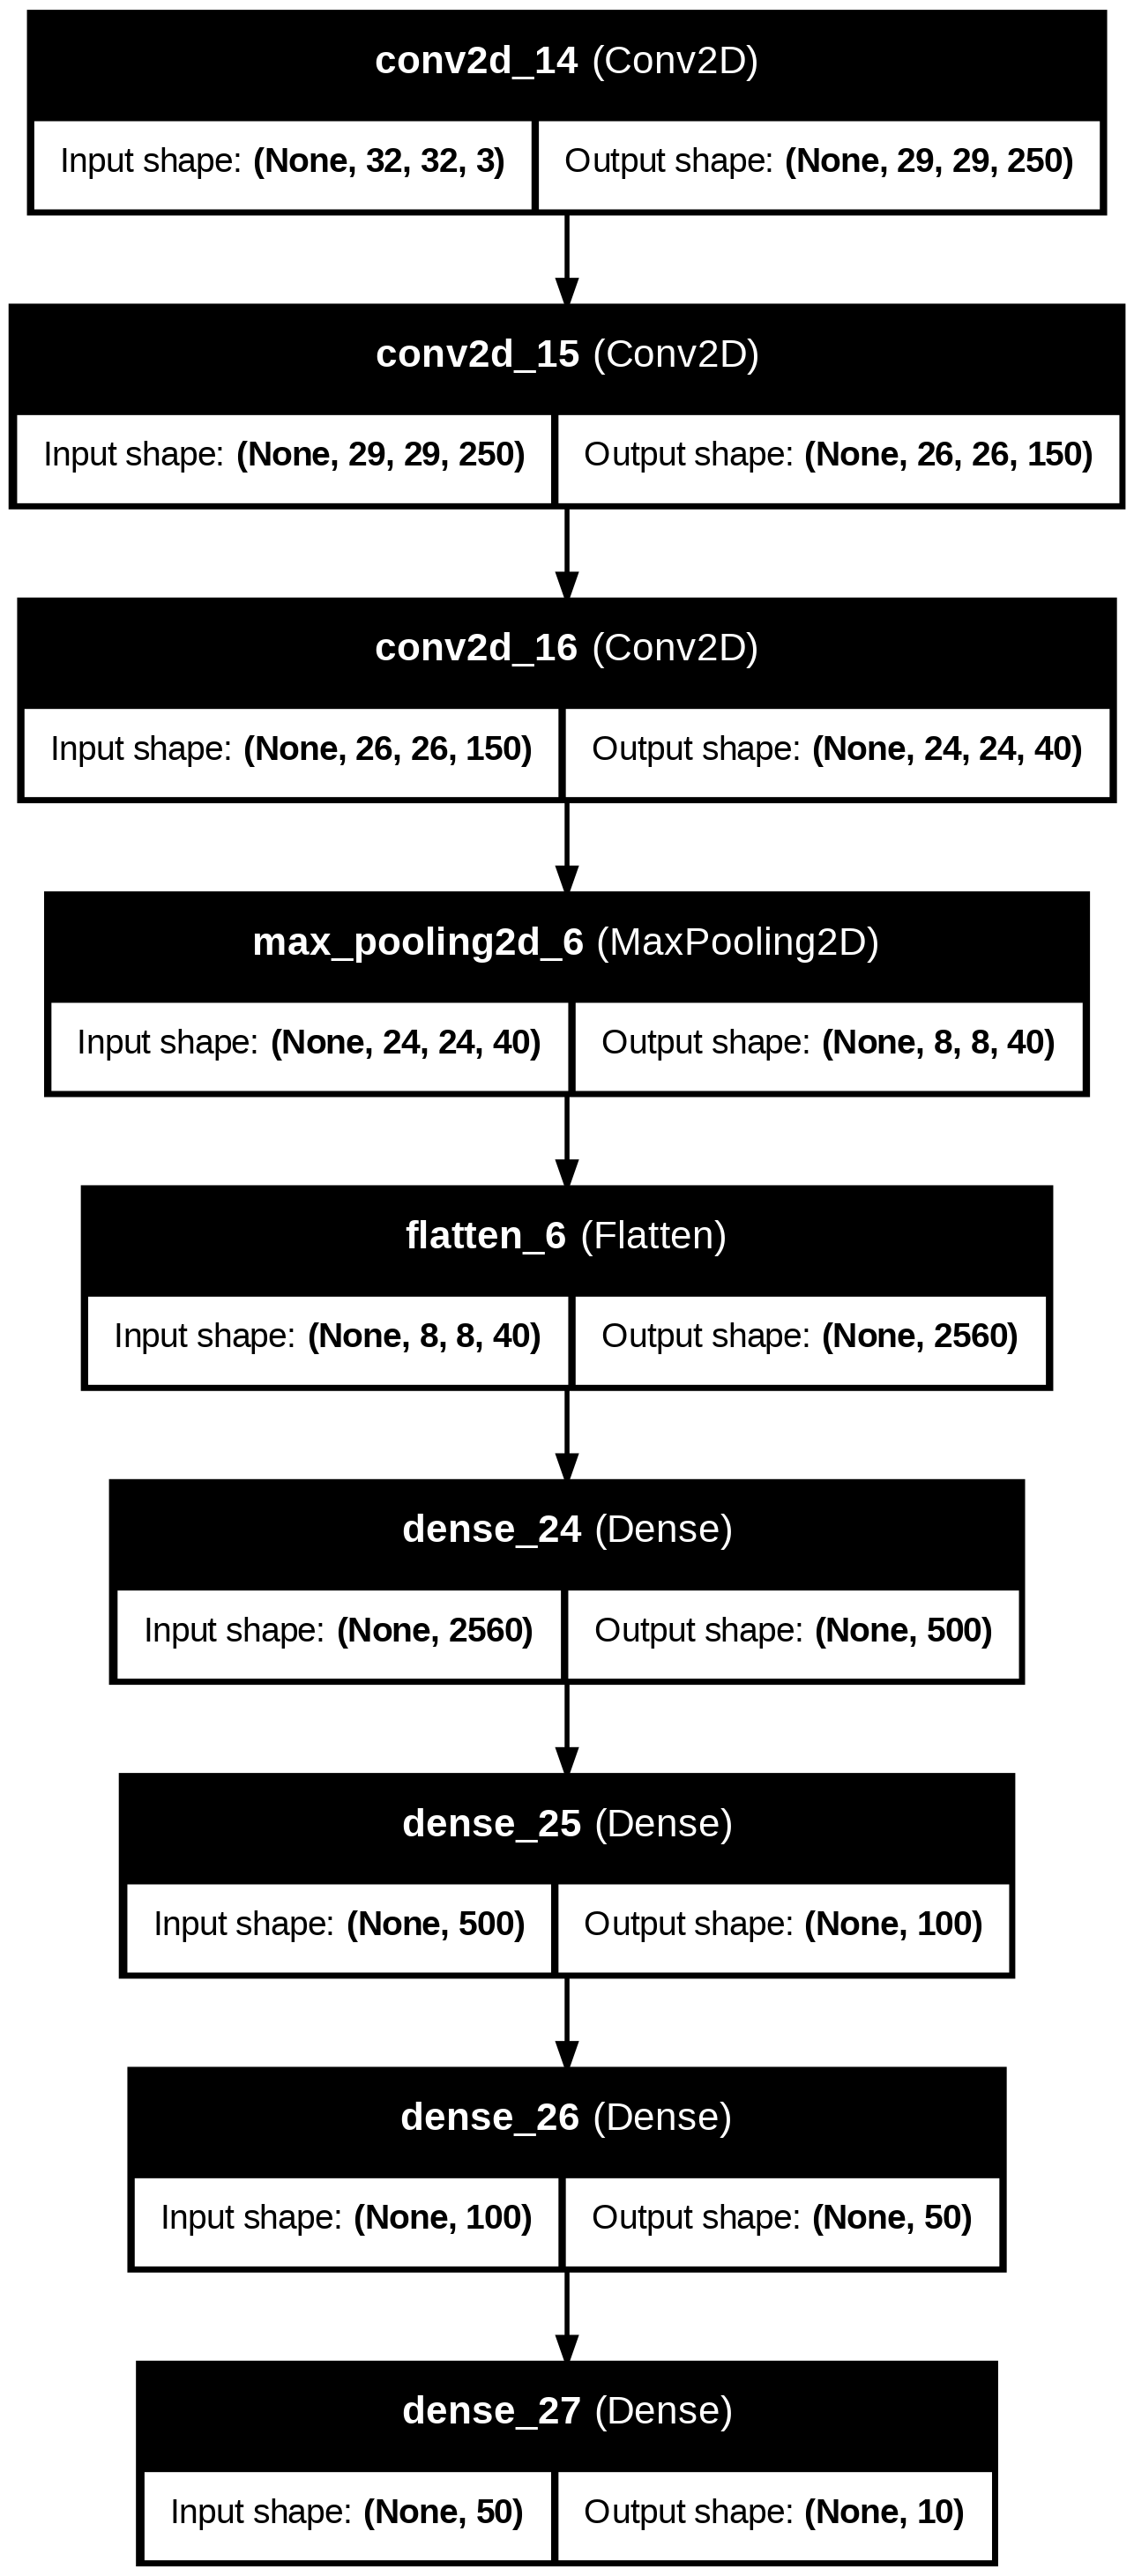

In [27]:
# keras imports for the dataset and building our neural network
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D , Flatten

model = Sequential()
# convolutional layer
model.add(Conv2D(250, kernel_size=(4,4), strides=1, padding='valid', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(150, kernel_size=(4,4), strides=1, padding='valid', activation='relu'))
model.add(Conv2D(40, kernel_size=(3,3), strides=1, padding='valid', activation='relu'))
# max pooling layer
model.add(MaxPool2D(pool_size=3))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))
# looking at the model summary
model.summary()
utils.plot_model(model, to_file='cifar10_mlp.png', show_shapes=True, show_layer_names=True)

In [28]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 89ms/step - accuracy: 0.2944 - loss: 1.9077 - val_accuracy: 0.5169 - val_loss: 1.3319
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.5293 - loss: 1.2993 - val_accuracy: 0.5909 - val_loss: 1.1514
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.6309 - loss: 1.0502 - val_accuracy: 0.6461 - val_loss: 1.0055
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.6912 - loss: 0.8813 - val_accuracy: 0.6722 - val_loss: 0.9448
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.7458 - loss: 0.7289 - val_accuracy: 0.6786 - val_loss: 0.9507
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.7929 - loss: 0.5931 - val_accuracy: 0.6916 - val_loss: 0.9428
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.8371 - loss: 0.4678 - val_accuracy: 0.6970 - val_loss: 0.9969
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.8761 - loss: 0.3576 - 

In [ ]:
# # keras imports for the dataset and building our neural network
# from keras.datasets import cifar10
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Conv2D, MaxPool2D , Flatten

# model = Sequential()
# # convolutional layer
# model.add(Conv2D(250, kernel_size=(3,3), strides=1, padding='valid', activation='relu', input_shape=(32,32,3)))
# model.add(Conv2D(150, kernel_size=(3,3), strides=1, padding='valid', activation='relu'))
# model.add(Conv2D(40, kernel_size=(3,3), strides=1, padding='valid', activation='relu'))
# model.add(MaxPool2D(pool_size=3))

# # flatten output of conv
# model.add(Flatten())

# # hidden layer
# model.add(Dense(500, activation='relu'))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(50, activation='relu'))

# # output layer
# model.add(Dense(10, activation='softmax'))
# # looking at the model summary
# model.summary()
# utils.plot_model(model, to_file='cifar10_mlp.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Epoch 1/10
# 391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.3385 - loss: 1.7799 - val_accuracy: 0.5663 - val_loss: 1.2366
# Epoch 2/10
# 391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.6015 - loss: 1.1221 - val_accuracy: 0.6553 - val_loss: 0.9851
# Epoch 3/10
# 391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 65ms/step - accuracy: 0.6871 - loss: 0.8954 - val_accuracy: 0.6973 - val_loss: 0.8820
# Epoch 4/10
# 391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.7499 - loss: 0.7183 - val_accuracy: 0.6915 - val_loss: 0.9065
# Epoch 5/10
# 391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 65ms/step - accuracy: 0.8018 - loss: 0.5664 - val_accuracy: 0.6953 - val_loss: 0.9796
# Epoch 6/10
# 391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.8519 - loss: 0.4313 - val_accuracy: 0.6989 - val_loss: 1.0398
# Epoch 7/10
# 391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 65ms/step - accuracy: 0.8904 - loss: 0.3154 - val_accuracy: 0.6984 - val_loss: 1.0475
# Epoch 8/10
# 391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.9267 - loss: 0.2144 - val_accuracy: 0.6966 - val_loss: 1.2788
# Epoch 9/10
# 391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 65ms/step - accuracy: 0.9464 - loss: 0.1594 - val_accuracy: 0.6927 - val_loss: 1.4167
# Epoch 10/10
# 391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.9557 - loss: 0.1293 - val_accuracy: 0.6920 - val_loss: 1.4284
# <keras.src.callbacks.history.History at 0x7e54932c6830>